In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [234]:
#------------------------------------------
# Scikit-Learn (Machine Learning utilities)
#------------------------------------------
from sklearn.model_selection import train_test_split
# Splits the dataset into training and testing sets to evaluate model performance.

from sklearn.preprocessing import LabelEncoder, StandardScaler
# LabelEncoder: Converts categorical labels (e.g., "cat", "dog") into numeric values.
# StandardScaler: Normalizes/standardizes numerical features so they have mean=0 and variance=1.

from sklearn.linear_model import Perceptron
# A simple linear classifier (single-layer neural network). Good for binary classification tasks.

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
# accuracy_score: Measures how many predictions are correct.
# classification_report: Shows precision, recall, and F1-score for each class.
# confusion_matrix: Shows where the model is making correct vs wrong predictions.

# --------------------------------------------
# TensorFlow / Keras (Deep Learning utilities)
#---------------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
# Lets you build a neural network layer-by-layer in a linear fashion.

from tensorflow.keras. layers import Dense
# Fully connected layer (every neuron connects to every neuron in the next layer).

from tensorflow.keras.layers import Dropout
# Randomly drops some neurons during training to prevent overfitting.

from tensorflow.keras.utils import to_categorical
#Converts class label (like 0,1,2) into one-hot encoding format (e.g., [1,0,0], [0,1,0]).


In [235]:
df = pd.read_csv('/content/drive/MyDrive/iris_dataset.csv')

In [236]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [237]:
df['target'].value_counts()

,count
target,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


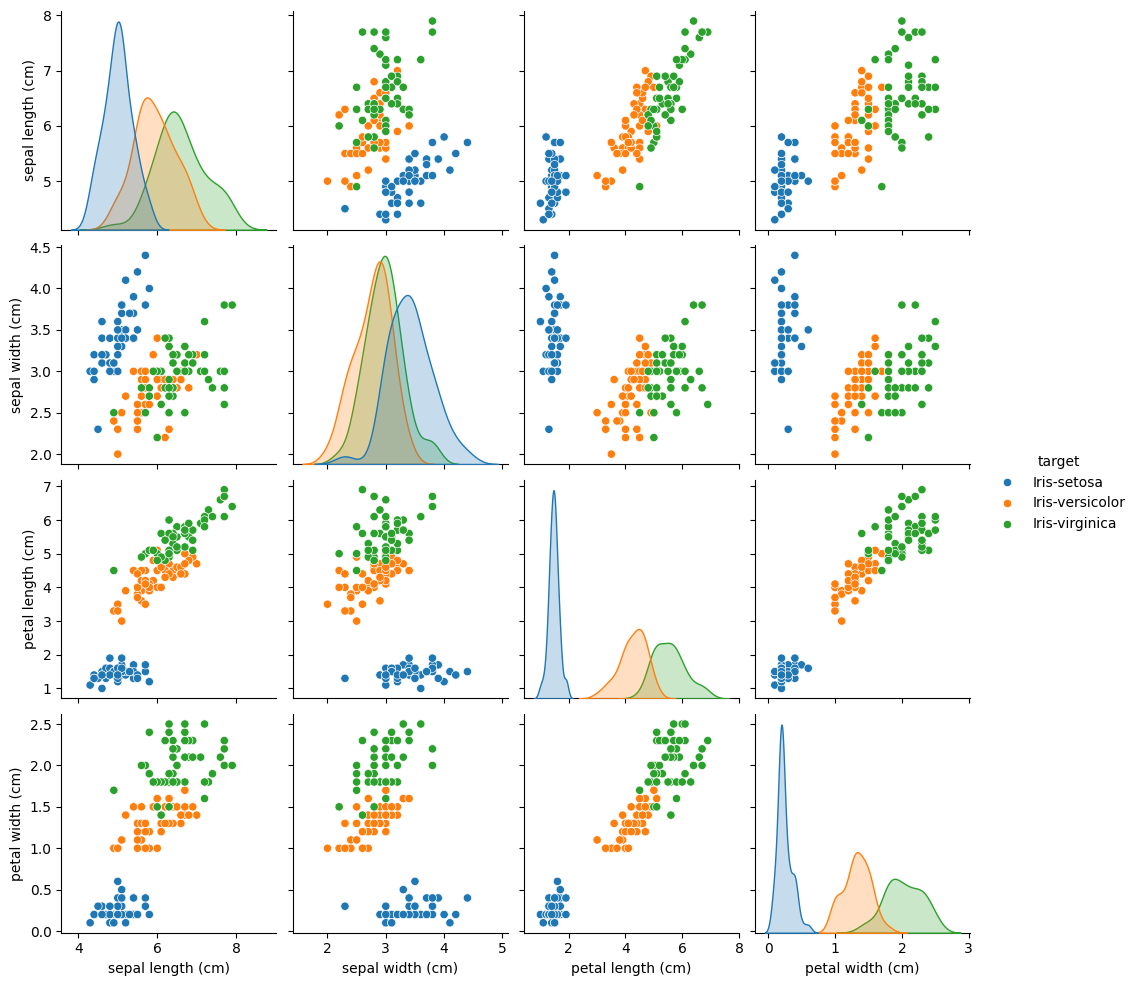

In [239]:
sns.pairplot(df,hue='target')


In [240]:
X = df.drop(columns=['target'], axis=1)
y = df['target']

In [241]:
encoder = LabelEncoder()
y_int = encoder.fit_transform(y)
y_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y_int, test_size=0.2, random_state=42, stratify=y_int)

In [243]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [244]:
per = Perceptron(max_iter=1000, random_state=42)
per.fit(X_train_scaled, y_train)

Perceptron(random_state=42)

In [245]:
y_pred_percep = per.predict(X_test_scaled)

In [246]:
accuracy_score(y_test, y_pred_percep)

0.8666666666666667

In [247]:
print(classification_report(y_test, y_pred_percep))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.88      0.70      0.78        10
           2       0.90      0.90      0.90        10

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.86        30
weighted avg       0.87      0.87      0.86        30



In [248]:
y_train_cat = to_categorical(y_train, num_classes = 3)
y_test_cat = to_categorical(y_test, num_classes = 3)



In [249]:
model = Sequential([
  Dense(16, input_dim = 4, activation = 'relu'),
  Dense(8, activation='relu'),
  Dense(3, activation= 'softmax')
])


In [250]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [251]:
history = model.fit(X_train_scaled, y_train_cat,
                    epochs=100, batch_size=10, validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4018 - loss: 0.9578 - val_accuracy: 0.3750 - val_loss: 0.9244
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4564 - loss: 0.9045 - val_accuracy: 0.3750 - val_loss: 0.8817
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4370 - loss: 0.9113 - val_accuracy: 0.4583 - val_loss: 0.8450
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6597 - loss: 0.7983 - val_accuracy: 0.5833 - val_loss: 0.8122
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6330 - loss: 0.8216 - val_accuracy: 0.7083 - val_loss: 0.7842
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7287 - loss: 0.7791 - val_accuracy: 0.8750 - val_loss: 0.7577
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7836 - loss: 0.7895 - val_accuracy: 0.8750 - val_loss: 0.7324
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8309 - loss: 0.7050 - val_accuracy: 0.91

In [252]:
loss, acc = model.evaluate(X_test_scaled, y_test_cat, verbose=1)
print(f'Test Accuracy: {acc}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9667 - loss: 0.0793
Test Accuracy: 0.9666666388511658


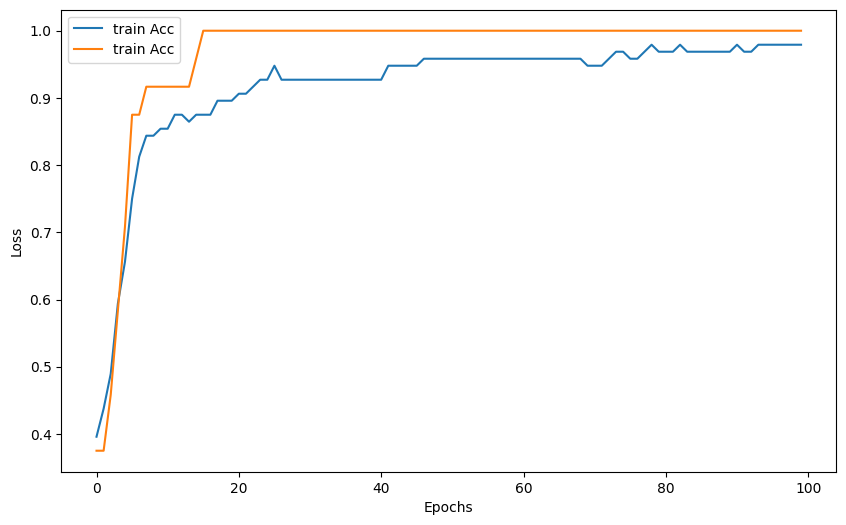

In [253]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='train Acc')
plt.plot(history.history['val_accuracy'], label='train Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()